In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

In [324]:
df = pd.read_excel(r"C:\Users\batuh\OneDrive\Masaüstü\Batu Projects\PROJE2.xlsx")

In [325]:
df.head()

,Unnamed: 0,Process Category,Process Name,Total Price,Age,Gender,Doctor Name,Patient Type,Months
0,0,PACKAGE SERVICES,ESWT,157.50,42,Women,Doctor A,Normal Patient,January
1,1,PACKAGE SERVICES,ESWT,157.50,51,Women,Doctor B,Normal Patient,January
2,2,PACKAGE SERVICES,ESWT,141.75,48,Women,Doctor E,Normal Patient,January
3,3,PACKAGE SERVICES,ESWT,157.50,46,Women,Doctor E,Normal Patient,January
4,4,PACKAGE SERVICES,ESWT,157.50,46,Women,Doctor E,Normal Patient,January


In [326]:
df = df.drop("Unnamed: 0", axis = 1)

In [327]:
df.tail()

,Process Category,Process Name,Total Price,Age,Gender,Doctor Name,Patient Type,Months
110393,MAGNETIC RESONANCE,"MRG, Lomber vertebra, without contrast",0.0,44,Women,Doctor B,Normal Patient,DECEMBER
110394,RADIOLOGY,Lomber A.P.,0.0,44,Women,Doctor B,Normal Patient,DECEMBER
110395,RADIOLOGY,Lomber Lateral,0.0,44,Women,Doctor B,Normal Patient,DECEMBER
110396,RADIOLOGY,Lomber Flexiyon,0.0,44,Women,Doctor B,Normal Patient,DECEMBER
110397,RADIOLOGY,Lomber Extansiyon,0.0,44,Women,Doctor B,Normal Patient,DECEMBER


In [328]:
df["Gender"].fillna("Men", inplace= True)

## FUNCTİONS

In [329]:
def graphs_for_category(df = df):
    for col in df.loc[:, df.nunique() < 30]:
        print("###################################################################################################################################")
        plt.grid()
        plt.ylabel(col)
        plt.xlabel("Toplam Sayı")
        sns.countplot(y = df[col], data = df)
        plt.show()
        print("###################################################################################################################################")
        print(("TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  ") + str(df[col].value_counts().sum()))
        print(df[col].value_counts())
        print("###################################################################################################################################")
        print(df[col].value_counts() * 100 / len(df))

In [330]:
def graphs_for_large_index (df, col, count):
    freq = df[col].value_counts().loc[lambda x : x > count]
    plt.grid(True)
    sns.barplot( y = freq.index, x = freq, data= df)
    plt.show()
    print("#####################################################################################")
    print(df[col].value_counts().loc[lambda x : x > count])
    print("#####################################################################################")
    rate = df[col].value_counts().loc[lambda x : x > count].sum()
    print(df[col].value_counts().loc[lambda x : x > count] * 100 / rate)

In [331]:
def check_df(dataframe, head = 10):
    print("################# SHAPE ###############")
    print(dataframe.shape)
    print("################ TYPES ################")
    print(dataframe.dtypes)
    print("################ TAİL ##################")
    print(dataframe.tail(head))
    print("################ NA ###################")
    print(dataframe.isnull().sum())
    print("################ Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [332]:
def cleaning_data(df):
    for col in df.loc[:, df.dtypes == "object"]:
        df[col].fillna("Empty Values", inplace = True)
    
    for col in df.loc[:, df.dtypes == "int64"]:
        df[col].fillna(0, inplace = True)

    for col in df.loc[:, df.dtypes == "float64"]:
        df[col].fillna(0, inplace = True)
  
    for col in df.loc[:, df.dtypes == "object"]:
        df[col] = df[col].str.strip()
    
    for col in df.loc[:, df.dtypes == "category"]:
        df[col] = df[col].str.strip()
    

In [333]:
def arrange_the_data(df):
    df.columns = [col.upper() for col in df.columns]

    for col in df.loc[:, df.dtypes == "object"]:
        df[col] = df[col].str.upper()

    for col in df.loc[:, df.dtypes == "category"]:
        df[col] = df[col].str.upper()

In [334]:
def graphs_for_numeric(df):
    for col in num_cols:
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print(df[col].describe().T)
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        plt.grid(True)
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [335]:
check_df(df)

################# SHAPE ###############
(110398, 8)
################ TYPES ################
Process Category     object
Process Name         object
Total Price         float64
Age                   int64
Gender               object
Doctor Name          object
Patient Type         object
Months               object
dtype: object
################ TAİL ##################
          Process Category                            Process Name  Total Price  Age Gender Doctor Name    Patient Type    Months
110388           RADIOLOGY                Merchant X-ray (Sunrise)       103.95   41    Men    Doctor F  Normal Patient  DECEMBER
110389           RADIOLOGY                         Rosenberg X-ray       103.95   41    Men    Doctor F  Normal Patient  DECEMBER
110390           RADIOLOGY                       JOINT X-ray JOINT       236.25   37  Women    Doctor F  Normal Patient  DECEMBER
110391           RADIOLOGY                       JOINT X-ray JOINT         0.00   44  Women    Doctor B  Norm

In [336]:
arrange_the_data(df)

In [337]:
cleaning_data(df)

In [338]:
df.head()

,PROCESS CATEGORY,PROCESS NAME,TOTAL PRICE,AGE,GENDER,DOCTOR NAME,PATIENT TYPE,MONTHS
0,PACKAGE SERVICES,ESWT,157.50,42,WOMEN,DOCTOR A,NORMAL PATIENT,JANUARY
1,PACKAGE SERVICES,ESWT,157.50,51,WOMEN,DOCTOR B,NORMAL PATIENT,JANUARY
2,PACKAGE SERVICES,ESWT,141.75,48,WOMEN,DOCTOR E,NORMAL PATIENT,JANUARY
3,PACKAGE SERVICES,ESWT,157.50,46,WOMEN,DOCTOR E,NORMAL PATIENT,JANUARY
4,PACKAGE SERVICES,ESWT,157.50,46,WOMEN,DOCTOR E,NORMAL PATIENT,JANUARY


## CHECK THE ALL DF

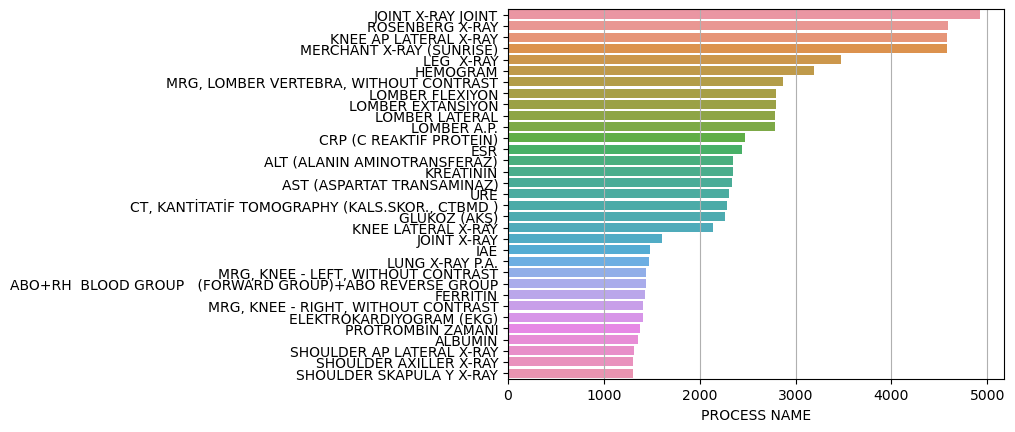

#####################################################################################
JOINT X-RAY JOINT                                          4928
ROSENBERG X-RAY                                            4590
KNEE AP LATERAL X-RAY                                      4583
MERCHANT X-RAY (SUNRISE)                                   4583
LEG  X-RAY                                                 3478
HEMOGRAM                                                   3194
MRG, LOMBER VERTEBRA, WITHOUT CONTRAST                     2864
LOMBER FLEXIYON                                            2794
LOMBER EXTANSIYON                                          2794
LOMBER LATERAL                                             2790
LOMBER A.P.                                                2790
CRP (C REAKTIF PROTEIN)                                    2473
ESR                                                        2446
ALT (ALANIN AMINOTRANSFERAZ)                               2346
KREATININ         

In [339]:
graphs_for_large_index(df= df, col= "PROCESS NAME", count= 1200)

###################################################################################################################################


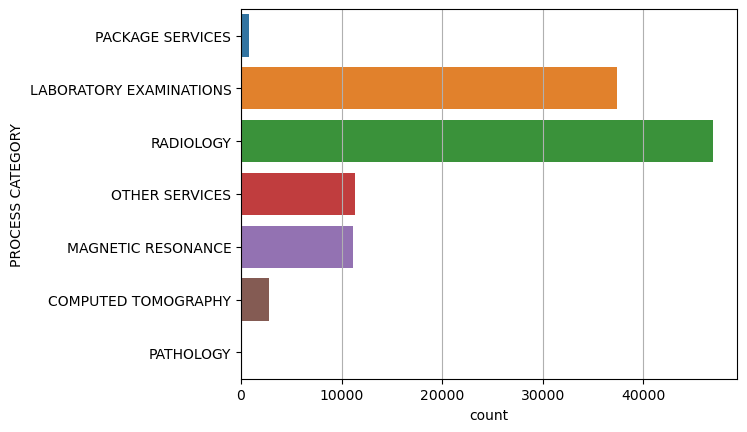

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  110398
RADIOLOGY                  46973
LABORATORY EXAMINATIONS    37390
OTHER SERVICES             11371
MAGNETIC RESONANCE         11164
COMPUTED TOMOGRAPHY         2750
PACKAGE SERVICES             744
PATHOLOGY                      6
Name: PROCESS CATEGORY, dtype: int64
###################################################################################################################################
RADIOLOGY                  42.548778
LABORATORY EXAMINATIONS    33.868367
OTHER SERVICES             10.300005
MAGNETIC RESONANCE         10.112502
COMPUTED TOMOGRAPHY         2.490987
PACKAGE SERVICES            0.673925
PATHOLOGY                   0.005435
Name: PROCESS CATEGORY, dtype: float64
##########################################################################################################

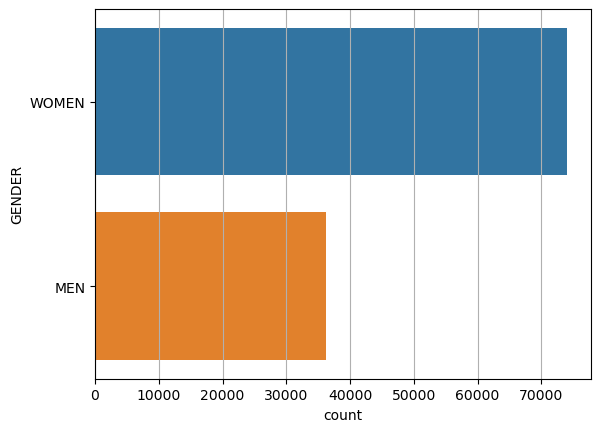

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  110398
WOMEN    74095
MEN      36303
Name: GENDER, dtype: int64
###################################################################################################################################
WOMEN    67.116252
MEN      32.883748
Name: GENDER, dtype: float64
###################################################################################################################################


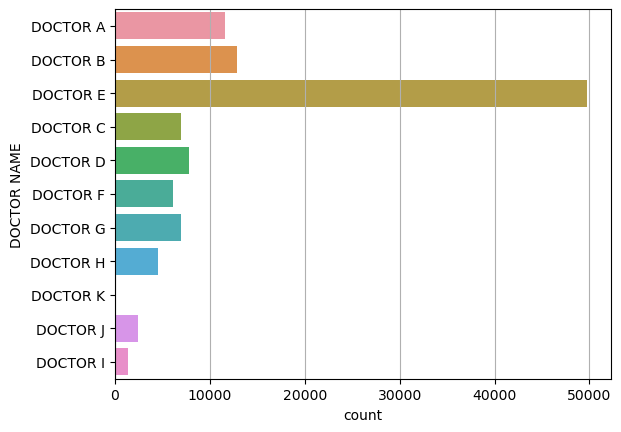

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  110398
DOCTOR E    49785
DOCTOR B    12861
DOCTOR A    11547
DOCTOR D     7830
DOCTOR G     6927
DOCTOR C     6922
DOCTOR F     6119
DOCTOR H     4504
DOCTOR J     2458
DOCTOR I     1400
DOCTOR K       45
Name: DOCTOR NAME, dtype: int64
###################################################################################################################################
DOCTOR E    45.095926
DOCTOR B    11.649668
DOCTOR A    10.459429
DOCTOR D     7.092520
DOCTOR G     6.274570
DOCTOR C     6.270041
DOCTOR F     5.542673
DOCTOR H     4.079784
DOCTOR J     2.226490
DOCTOR I     1.268139
DOCTOR K     0.040762
Name: DOCTOR NAME, dtype: float64
###################################################################################################################################


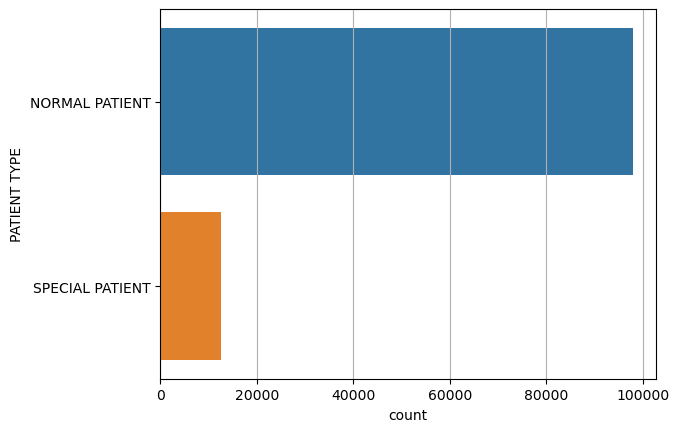

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  110398
NORMAL PATIENT     97882
SPECIAL PATIENT    12516
Name: PATIENT TYPE, dtype: int64
###################################################################################################################################
NORMAL PATIENT     88.662838
SPECIAL PATIENT    11.337162
Name: PATIENT TYPE, dtype: float64
###################################################################################################################################


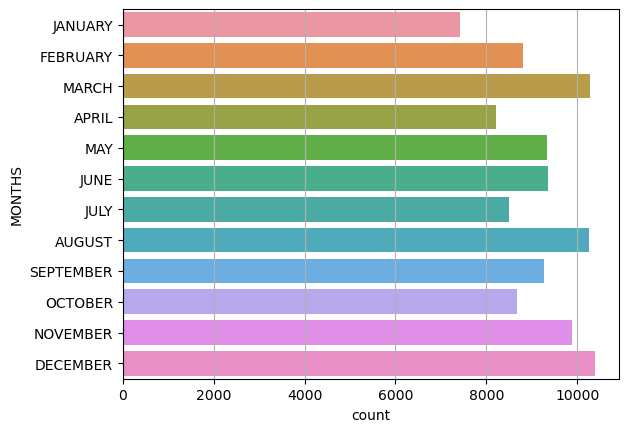

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  110398
DECEMBER     10394
MARCH        10283
AUGUST       10265
NOVEMBER      9874
JUNE          9356
MAY           9324
SEPTEMBER     9267
FEBRUARY      8816
OCTOBER       8682
JULY          8497
APRIL         8221
JANUARY       7419
Name: MONTHS, dtype: int64
###################################################################################################################################
DECEMBER     9.415026
MARCH        9.314480
AUGUST       9.298176
NOVEMBER     8.944003
JUNE         8.474791
MAY          8.445805
SEPTEMBER    8.394174
FEBRUARY     7.985652
OCTOBER      7.864273
JULY         7.696697
APRIL        7.446693
JANUARY      6.720230
Name: MONTHS, dtype: float64


In [340]:
graphs_for_category(df)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    110398.000000
mean        183.149896
std         381.777611
min           0.000000
25%           0.000000
50%          77.000000
75%         204.003867
max       31500.000000
Name: TOTAL PRICE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


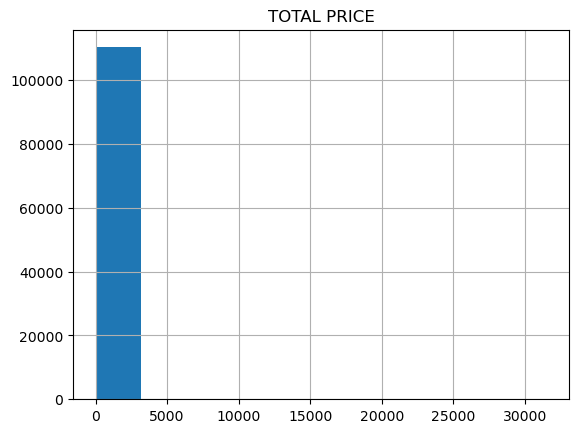

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    110398.000000
mean         54.300522
std          17.752506
min           3.000000
25%          42.000000
50%          57.000000
75%          68.000000
max         100.000000
Name: AGE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


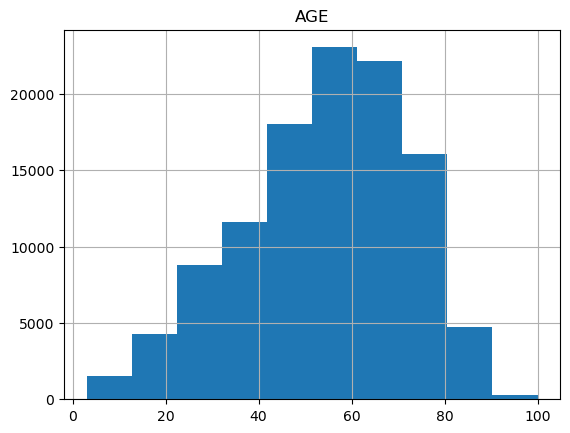

In [341]:
num_cols = [col for col in df.columns if str(df[col].dtypes) in ["int64","float64"]]
graphs_for_numeric(df)

## RADIOLOGY

In [342]:
r_df = df.loc[df["PROCESS CATEGORY"] == "RADIOLOGY"]

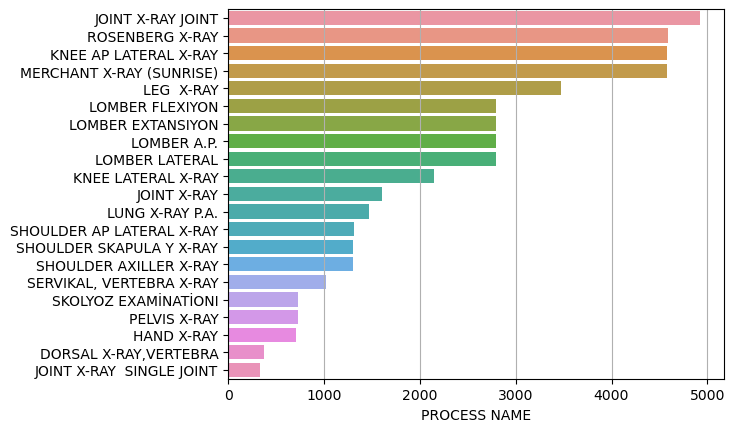

#####################################################################################
JOINT X-RAY JOINT            4928
ROSENBERG X-RAY              4590
KNEE AP LATERAL X-RAY        4583
MERCHANT X-RAY (SUNRISE)     4583
LEG  X-RAY                   3478
LOMBER FLEXIYON              2794
LOMBER EXTANSIYON            2794
LOMBER A.P.                  2790
LOMBER LATERAL               2790
KNEE LATERAL X-RAY           2144
JOINT X-RAY                  1610
LUNG X-RAY P.A.              1472
SHOULDER AP LATERAL X-RAY    1310
SHOULDER SKAPULA Y X-RAY     1306
SHOULDER AXILLER X-RAY       1306
SERVIKAL, VERTEBRA X-RAY     1018
SKOLYOZ EXAMİNATİONI          728
PELVIS X-RAY                  725
HAND X-RAY                    711
DORSAL X-RAY,VERTEBRA         375
JOINT X-RAY  SINGLE JOINT     337
Name: PROCESS NAME, dtype: int64
#####################################################################################
JOINT X-RAY JOINT            10.627103
ROSENBERG X-RAY               9.898214
KNE

In [343]:
graphs_for_large_index(df= r_df, col= "PROCESS NAME", count= 300)

###################################################################################################################################


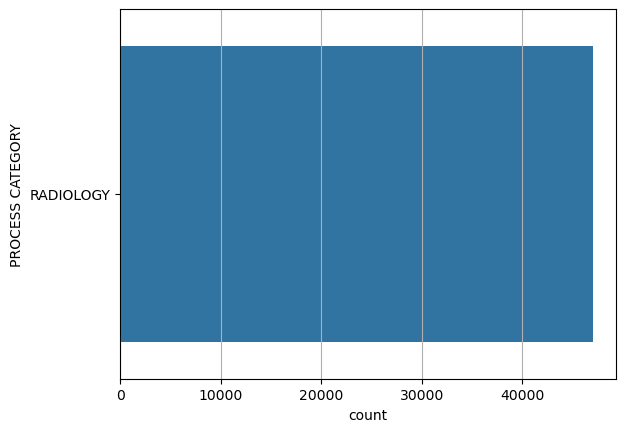

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  46973
RADIOLOGY    46973
Name: PROCESS CATEGORY, dtype: int64
###################################################################################################################################
RADIOLOGY    100.0
Name: PROCESS CATEGORY, dtype: float64
###################################################################################################################################


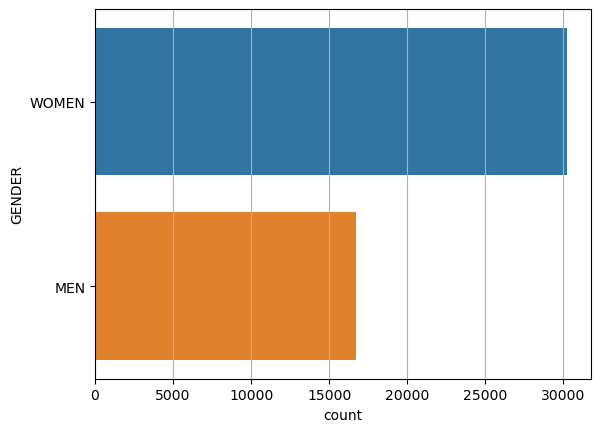

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  46973
WOMEN    30252
MEN      16721
Name: GENDER, dtype: int64
###################################################################################################################################
WOMEN    64.402955
MEN      35.597045
Name: GENDER, dtype: float64
###################################################################################################################################


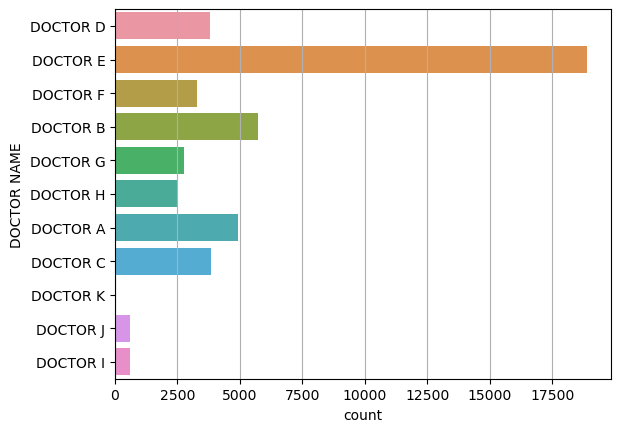

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  46973
DOCTOR E    18906
DOCTOR B     5729
DOCTOR A     4902
DOCTOR C     3827
DOCTOR D     3799
DOCTOR F     3274
DOCTOR G     2780
DOCTOR H     2538
DOCTOR J      612
DOCTOR I      580
DOCTOR K       26
Name: DOCTOR NAME, dtype: int64
###################################################################################################################################
DOCTOR E    40.248653
DOCTOR B    12.196368
DOCTOR A    10.435782
DOCTOR C     8.147234
DOCTOR D     8.087625
DOCTOR F     6.969961
DOCTOR G     5.918293
DOCTOR H     5.403104
DOCTOR J     1.302876
DOCTOR I     1.234752
DOCTOR K     0.055351
Name: DOCTOR NAME, dtype: float64
###################################################################################################################################


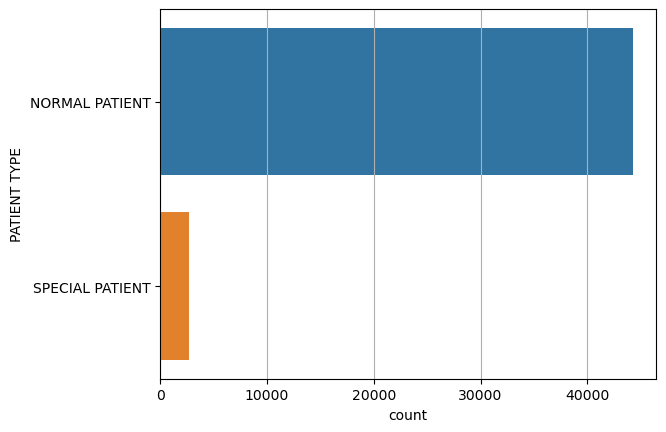

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  46973
NORMAL PATIENT     44241
SPECIAL PATIENT     2732
Name: PATIENT TYPE, dtype: int64
###################################################################################################################################
NORMAL PATIENT     94.183893
SPECIAL PATIENT     5.816107
Name: PATIENT TYPE, dtype: float64
###################################################################################################################################


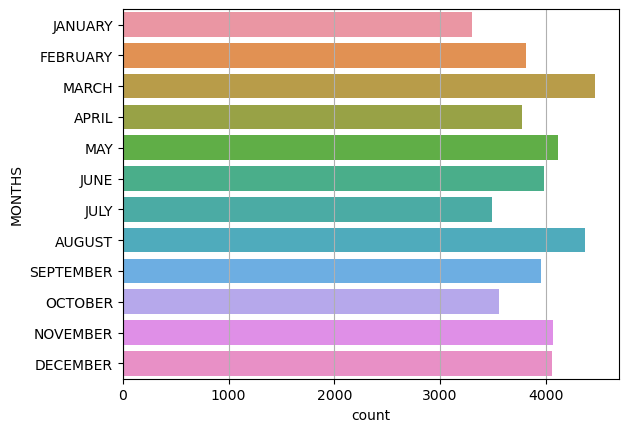

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  46973
MARCH        4466
AUGUST       4372
MAY          4118
NOVEMBER     4072
DECEMBER     4056
JUNE         3987
SEPTEMBER    3951
FEBRUARY     3816
APRIL        3778
OCTOBER      3560
JULY         3494
JANUARY      3303
Name: MONTHS, dtype: int64
###################################################################################################################################
MARCH        9.507589
AUGUST       9.307475
MAY          8.766738
NOVEMBER     8.668810
DECEMBER     8.634748
JUNE         8.487855
SEPTEMBER    8.411215
FEBRUARY     8.123816
APRIL        8.042918
OCTOBER      7.578822
JULY         7.438316
JANUARY      7.031699
Name: MONTHS, dtype: float64


In [344]:
graphs_for_category(r_df)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    46973.000000
mean       148.970898
std        180.790021
min          0.000000
25%         70.875000
50%        103.950000
75%        164.500000
max       3822.000000
Name: TOTAL PRICE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


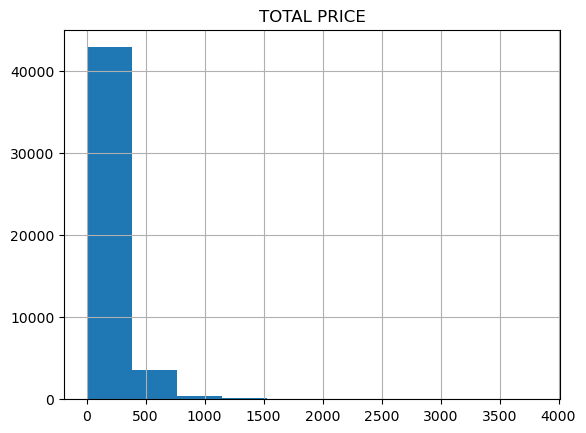

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    46973.000000
mean        51.843868
std         18.619684
min          3.000000
25%         39.000000
50%         54.000000
75%         66.000000
max        100.000000
Name: AGE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


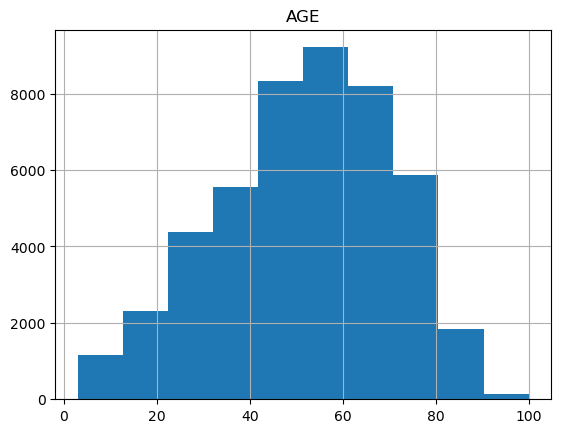

In [345]:
graphs_for_numeric(r_df)

## LABORATORY 

In [346]:
l_df = df.loc[df["PROCESS CATEGORY"] == "LABORATORY EXAMINATIONS"]

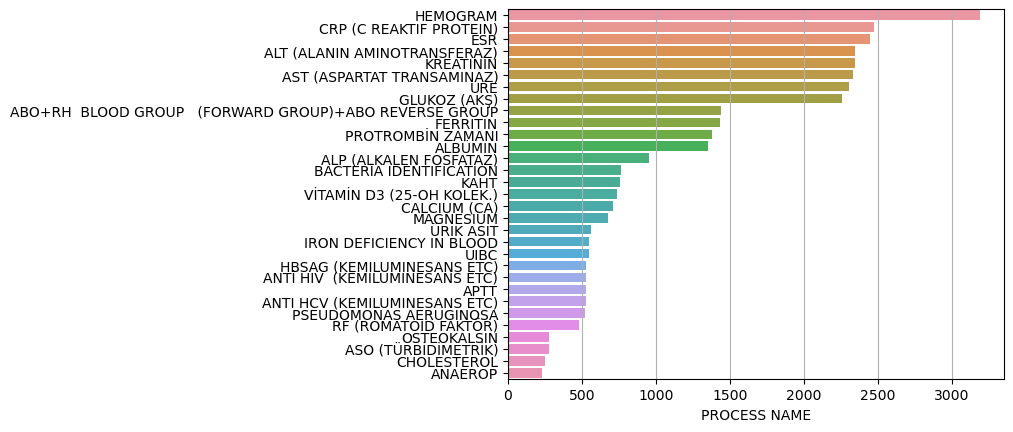

#####################################################################################
HEMOGRAM                                                   3194
CRP (C REAKTIF PROTEIN)                                    2473
ESR                                                        2446
ALT (ALANIN AMINOTRANSFERAZ)                               2346
KREATININ                                                  2344
AST (ASPARTAT TRANSAMINAZ)                                 2335
URE                                                        2309
GLUKOZ (AKŞ)                                               2261
ABO+RH  BLOOD GROUP   (FORWARD GROUP)+ABO REVERSE GROUP    1438
FERRITIN                                                   1432
PROTROMBİN ZAMANI                                          1378
ALBÜMIN                                                    1355
ALP (ALKALEN FOSFATAZ)                                      955
BACTERIA IDENTIFICATION                                     761
KAHT              

In [347]:
graphs_for_large_index(df= l_df, col= "PROCESS NAME", count= 200)

###################################################################################################################################


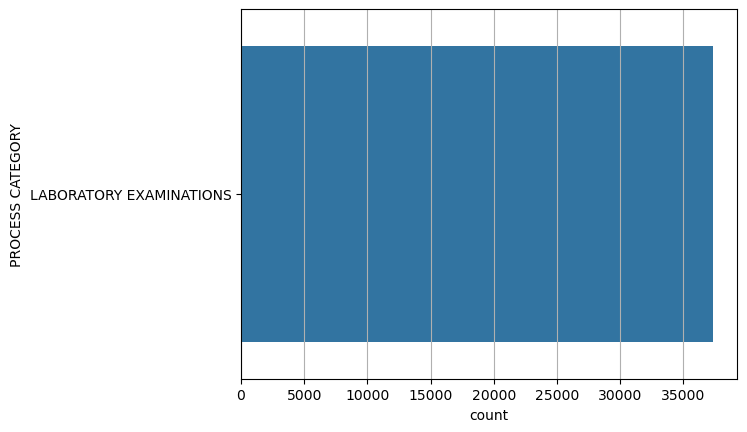

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  37390
LABORATORY EXAMINATIONS    37390
Name: PROCESS CATEGORY, dtype: int64
###################################################################################################################################
LABORATORY EXAMINATIONS    100.0
Name: PROCESS CATEGORY, dtype: float64
###################################################################################################################################


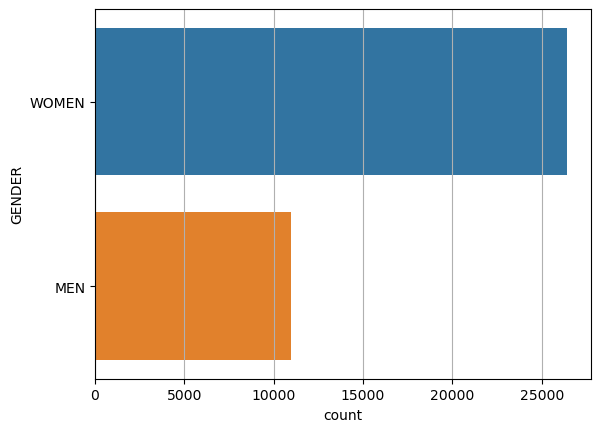

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  37390
WOMEN    26437
MEN      10953
Name: GENDER, dtype: int64
###################################################################################################################################
WOMEN    70.706071
MEN      29.293929
Name: GENDER, dtype: float64
###################################################################################################################################


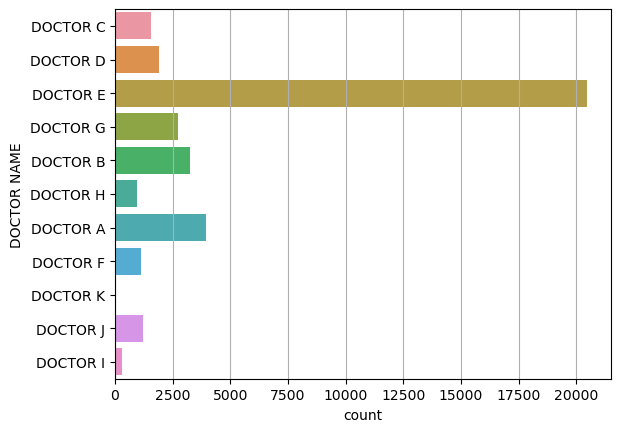

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  37390
DOCTOR E    20487
DOCTOR A     3949
DOCTOR B     3236
DOCTOR G     2716
DOCTOR D     1893
DOCTOR C     1543
DOCTOR J     1196
DOCTOR F     1134
DOCTOR H      940
DOCTOR I      288
DOCTOR K        8
Name: DOCTOR NAME, dtype: int64
###################################################################################################################################
DOCTOR E    54.792725
DOCTOR A    10.561647
DOCTOR B     8.654721
DOCTOR G     7.263974
DOCTOR D     5.062851
DOCTOR C     4.126772
DOCTOR J     3.198716
DOCTOR F     3.032896
DOCTOR H     2.514041
DOCTOR I     0.770259
DOCTOR K     0.021396
Name: DOCTOR NAME, dtype: float64
###################################################################################################################################


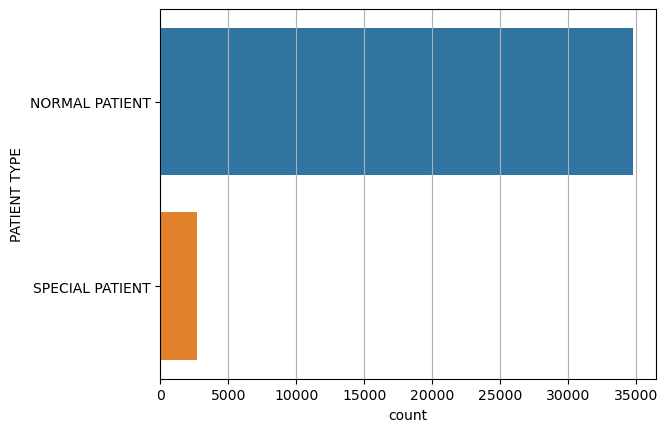

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  37390
NORMAL PATIENT     34722
SPECIAL PATIENT     2668
Name: PATIENT TYPE, dtype: int64
###################################################################################################################################
NORMAL PATIENT     92.864402
SPECIAL PATIENT     7.135598
Name: PATIENT TYPE, dtype: float64
###################################################################################################################################


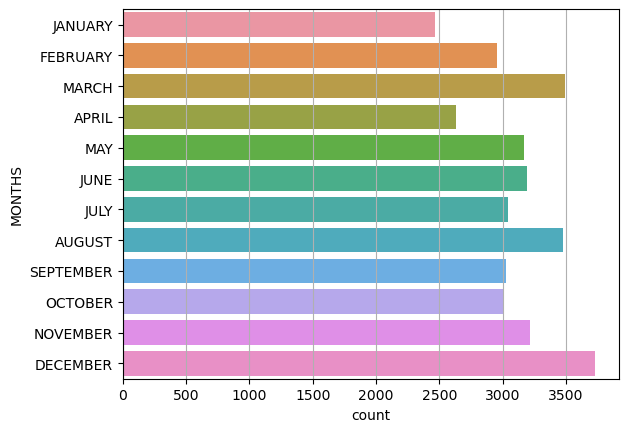

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  37390
DECEMBER     3729
MARCH        3492
AUGUST       3478
NOVEMBER     3212
JUNE         3191
MAY          3165
JULY         3039
SEPTEMBER    3029
OCTOBER      3001
FEBRUARY     2958
APRIL        2630
JANUARY      2466
Name: MONTHS, dtype: int64
###################################################################################################################################
DECEMBER     9.973255
MARCH        9.339396
AUGUST       9.301952
NOVEMBER     8.590532
JUNE         8.534367
MAY          8.464830
JULY         8.127842
SEPTEMBER    8.101097
OCTOBER      8.026210
FEBRUARY     7.911206
APRIL        7.033966
JANUARY      6.595346
Name: MONTHS, dtype: float64


In [348]:
graphs_for_category(df= l_df)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    37390.000000
mean        48.130972
std         96.834674
min          0.000000
25%          0.000000
50%         24.500000
75%         52.500000
max       2133.250000
Name: TOTAL PRICE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


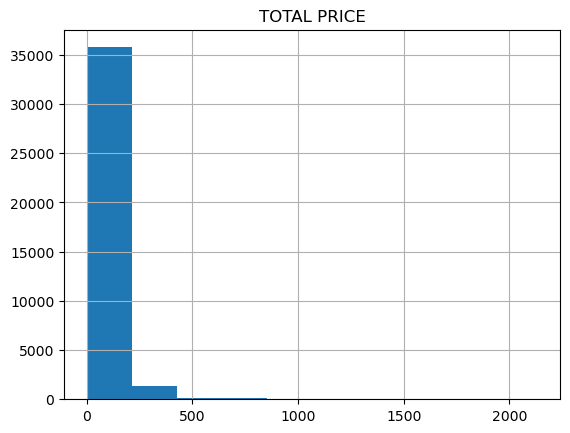

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    37390.000000
mean        57.817732
std         16.674727
min          4.000000
25%         48.000000
50%         61.000000
75%         70.000000
max         96.000000
Name: AGE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


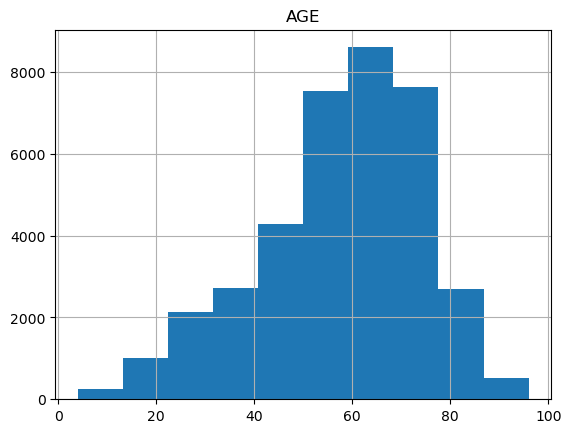

In [349]:
graphs_for_numeric(df= l_df)

## OTHER SERVICES

In [350]:
df_other = df.loc[df["PROCESS CATEGORY"] == "OTHER SERVICES"]

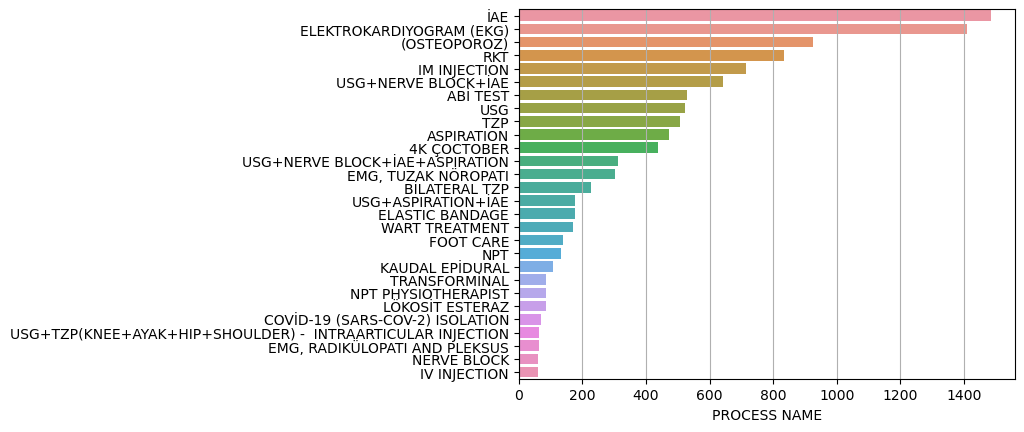

#####################################################################################
İAE                                                            1486
ELEKTROKARDIYOGRAM (EKG)                                       1409
(OSTEOPOROZ)                                                    925
RKT                                                             834
IM INJECTION                                                    713
USG+NERVE BLOCK+İAE                                             643
ABİ TEST                                                        528
USG                                                             524
TZP                                                             507
ASPIRATION                                                      471
4K ÇOCTOBER                                                     437
USG+NERVE BLOCK+İAE+ASPIRATION                                  313
EMG, TUZAK NÖROPATI                                             301
BİLATERAL TZP                 

In [351]:
graphs_for_large_index(df= df_other, col= "PROCESS NAME", count= 50)

###################################################################################################################################


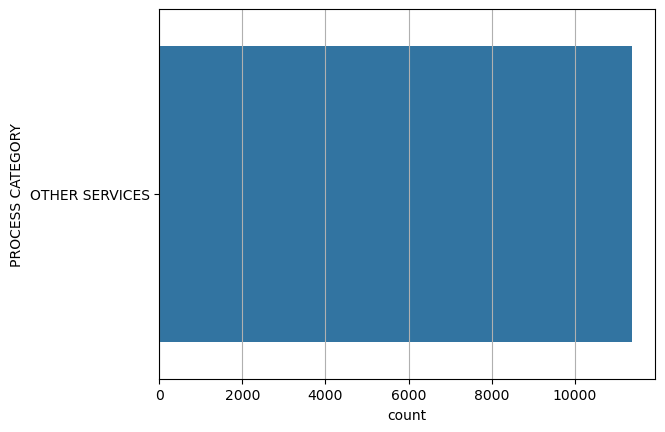

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11371
OTHER SERVICES    11371
Name: PROCESS CATEGORY, dtype: int64
###################################################################################################################################
OTHER SERVICES    100.0
Name: PROCESS CATEGORY, dtype: float64
###################################################################################################################################


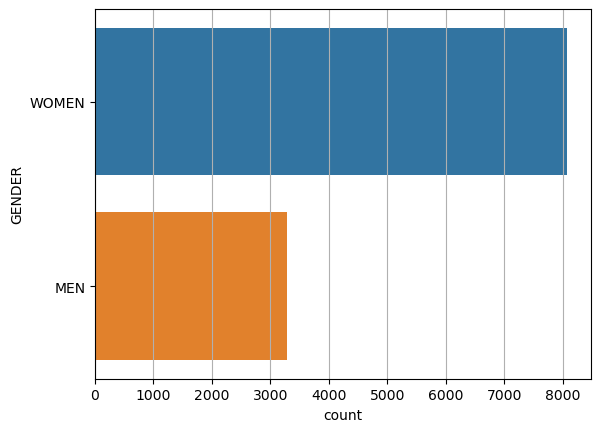

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11371
WOMEN    8080
MEN      3291
Name: GENDER, dtype: int64
###################################################################################################################################
WOMEN    71.057954
MEN      28.942046
Name: GENDER, dtype: float64
###################################################################################################################################


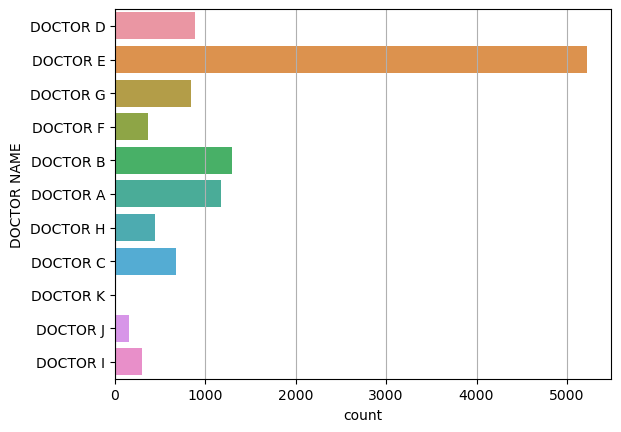

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11371
DOCTOR E    5227
DOCTOR B    1291
DOCTOR A    1170
DOCTOR D     880
DOCTOR G     840
DOCTOR C     680
DOCTOR H     446
DOCTOR F     370
DOCTOR I     302
DOCTOR J     160
DOCTOR K       5
Name: DOCTOR NAME, dtype: int64
###################################################################################################################################
DOCTOR E    45.967813
DOCTOR B    11.353443
DOCTOR A    10.289333
DOCTOR D     7.738985
DOCTOR G     7.387213
DOCTOR C     5.980125
DOCTOR H     3.922258
DOCTOR F     3.253891
DOCTOR I     2.655879
DOCTOR J     1.407088
DOCTOR K     0.043972
Name: DOCTOR NAME, dtype: float64
###################################################################################################################################


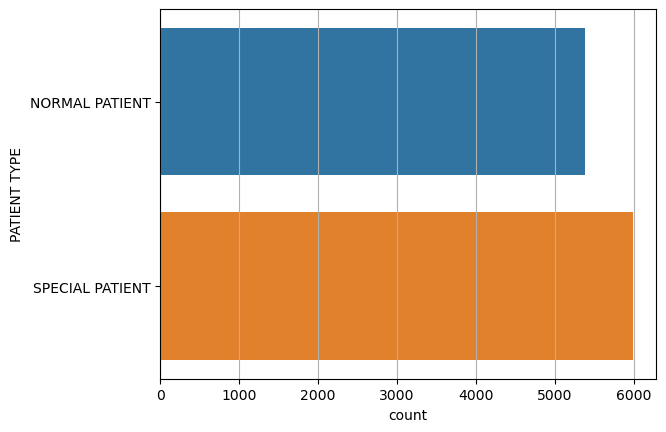

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11371
SPECIAL PATIENT    5985
NORMAL PATIENT     5386
Name: PATIENT TYPE, dtype: int64
###################################################################################################################################
SPECIAL PATIENT    52.633893
NORMAL PATIENT     47.366107
Name: PATIENT TYPE, dtype: float64
###################################################################################################################################


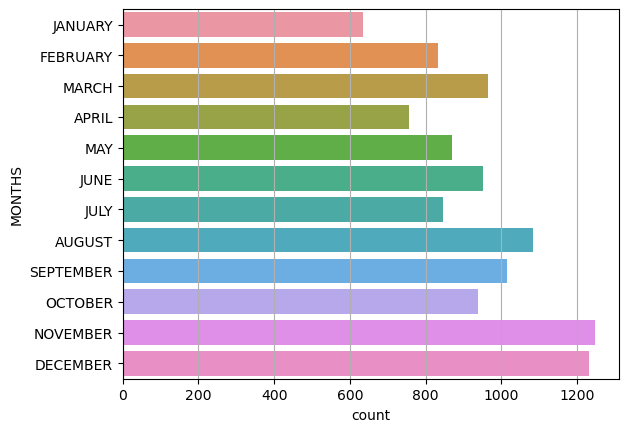

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11371
NOVEMBER     1248
DECEMBER     1231
AUGUST       1085
SEPTEMBER    1015
MARCH         966
JUNE          951
OCTOBER       939
MAY           869
JULY          846
FEBRUARY      832
APRIL         755
JANUARY       634
Name: MONTHS, dtype: int64
###################################################################################################################################
NOVEMBER     10.975288
DECEMBER     10.825785
AUGUST        9.541817
SEPTEMBER     8.926216
MARCH         8.495295
JUNE          8.363381
OCTOBER       8.257849
MAY           7.642248
JULY          7.439979
FEBRUARY      7.316859
APRIL         6.639697
JANUARY       5.575587
Name: MONTHS, dtype: float64


In [352]:
graphs_for_category(df= df_other)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    11371.000000
mean       409.810903
std        951.542810
min          0.000000
25%          0.000000
50%        148.750000
75%        638.750000
max      31500.000000
Name: TOTAL PRICE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


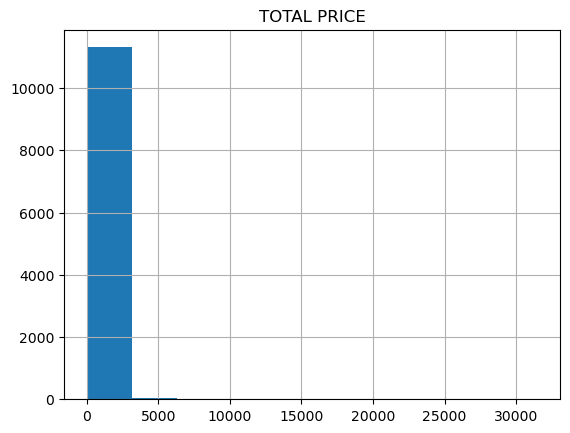

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    11371.000000
mean        57.721924
std         16.029389
min          3.000000
25%         48.000000
50%         59.000000
75%         69.000000
max        100.000000
Name: AGE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


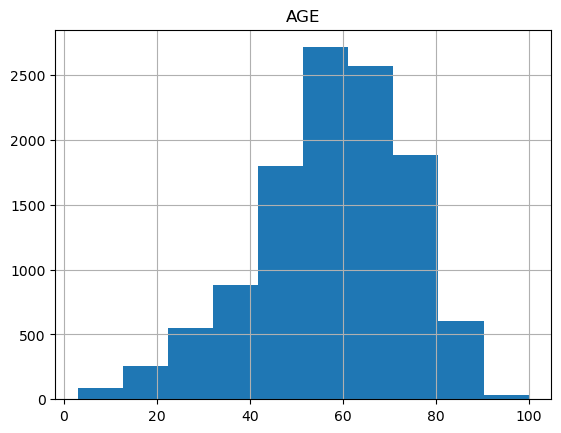

In [353]:
graphs_for_numeric(df_other)

## PACKAGE SERVICES

In [354]:
df_package = df.loc[df["PROCESS CATEGORY"] == "PACKAGE SERVICES"]

###################################################################################################################################


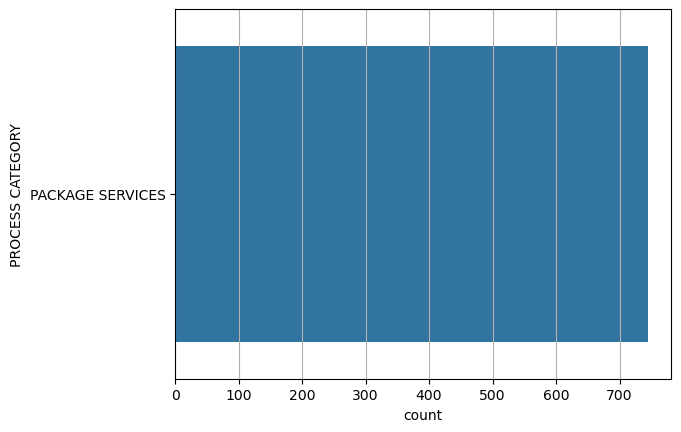

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  744
PACKAGE SERVICES    744
Name: PROCESS CATEGORY, dtype: int64
###################################################################################################################################
PACKAGE SERVICES    100.0
Name: PROCESS CATEGORY, dtype: float64
###################################################################################################################################


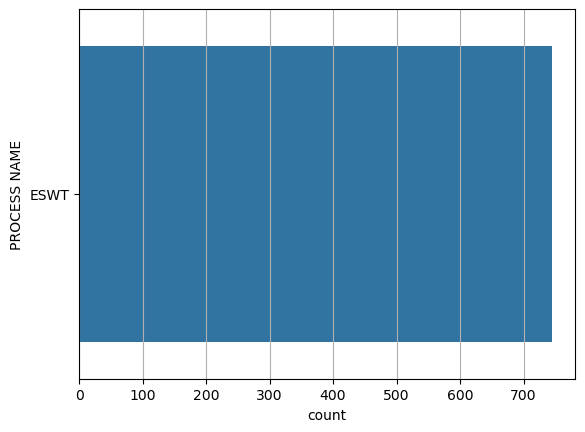

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  744
ESWT    744
Name: PROCESS NAME, dtype: int64
###################################################################################################################################
ESWT    100.0
Name: PROCESS NAME, dtype: float64
###################################################################################################################################


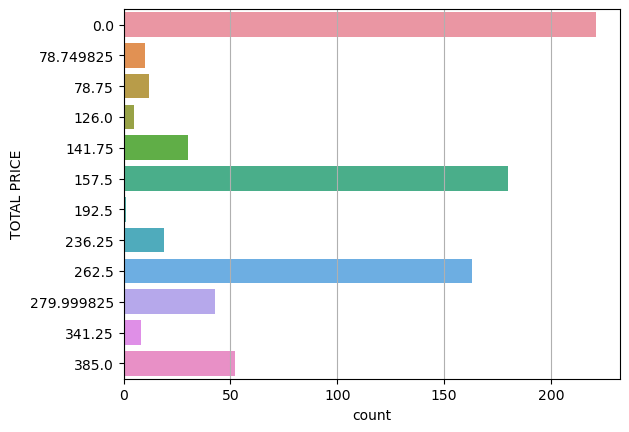

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  744
0.000000      221
157.500000    180
262.500000    163
385.000000     52
279.999825     43
141.750000     30
236.250000     19
78.750000      12
78.749825      10
341.250000      8
126.000000      5
192.500000      1
Name: TOTAL PRICE, dtype: int64
###################################################################################################################################
0.000000      29.704301
157.500000    24.193548
262.500000    21.908602
385.000000     6.989247
279.999825     5.779570
141.750000     4.032258
236.250000     2.553763
78.750000      1.612903
78.749825      1.344086
341.250000     1.075269
126.000000     0.672043
192.500000     0.134409
Name: TOTAL PRICE, dtype: float64
#########################################################################################################

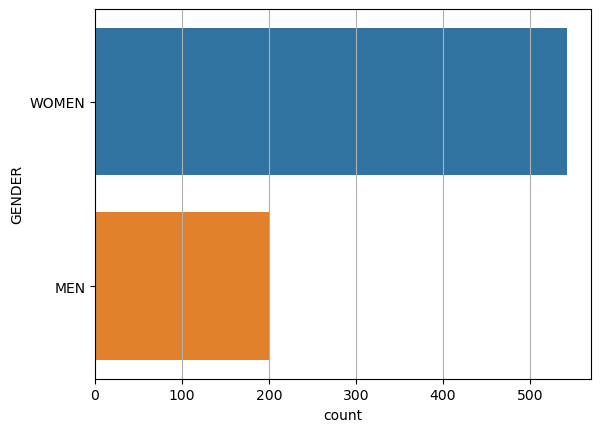

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  744
WOMEN    543
MEN      201
Name: GENDER, dtype: int64
###################################################################################################################################
WOMEN    72.983871
MEN      27.016129
Name: GENDER, dtype: float64
###################################################################################################################################


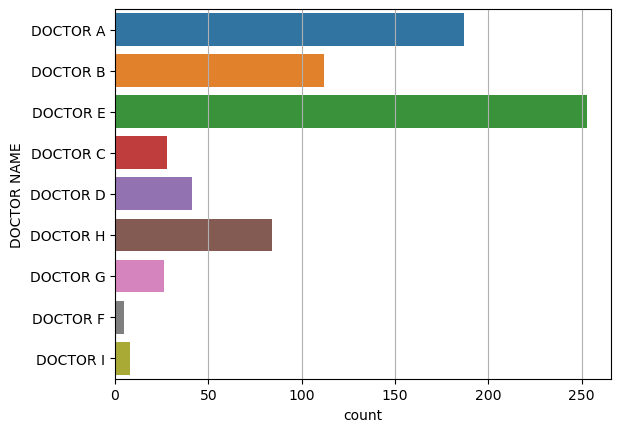

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  744
DOCTOR E    253
DOCTOR A    187
DOCTOR B    112
DOCTOR H     84
DOCTOR D     41
DOCTOR C     28
DOCTOR G     26
DOCTOR I      8
DOCTOR F      5
Name: DOCTOR NAME, dtype: int64
###################################################################################################################################
DOCTOR E    34.005376
DOCTOR A    25.134409
DOCTOR B    15.053763
DOCTOR H    11.290323
DOCTOR D     5.510753
DOCTOR C     3.763441
DOCTOR G     3.494624
DOCTOR I     1.075269
DOCTOR F     0.672043
Name: DOCTOR NAME, dtype: float64
###################################################################################################################################


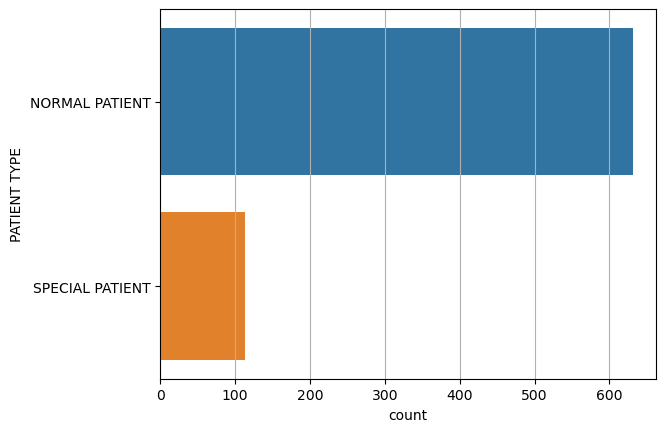

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  744
NORMAL PATIENT     631
SPECIAL PATIENT    113
Name: PATIENT TYPE, dtype: int64
###################################################################################################################################
NORMAL PATIENT     84.811828
SPECIAL PATIENT    15.188172
Name: PATIENT TYPE, dtype: float64
###################################################################################################################################


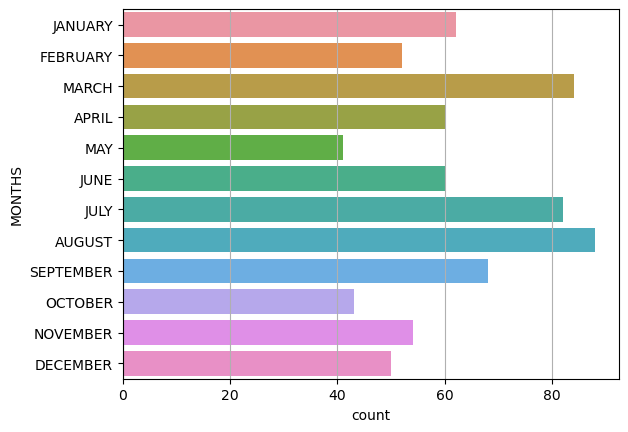

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  744
AUGUST       88
MARCH        84
JULY         82
SEPTEMBER    68
JANUARY      62
APRIL        60
JUNE         60
NOVEMBER     54
FEBRUARY     52
DECEMBER     50
OCTOBER      43
MAY          41
Name: MONTHS, dtype: int64
###################################################################################################################################
AUGUST       11.827957
MARCH        11.290323
JULY         11.021505
SEPTEMBER     9.139785
JANUARY       8.333333
APRIL         8.064516
JUNE          8.064516
NOVEMBER      7.258065
FEBRUARY      6.989247
DECEMBER      6.720430
OCTOBER       5.779570
MAY           5.510753
Name: MONTHS, dtype: float64


In [355]:
graphs_for_category(df_package)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    744.000000
mean     157.558791
std      122.523108
min        0.000000
25%        0.000000
50%      157.500000
75%      262.500000
max      385.000000
Name: TOTAL PRICE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


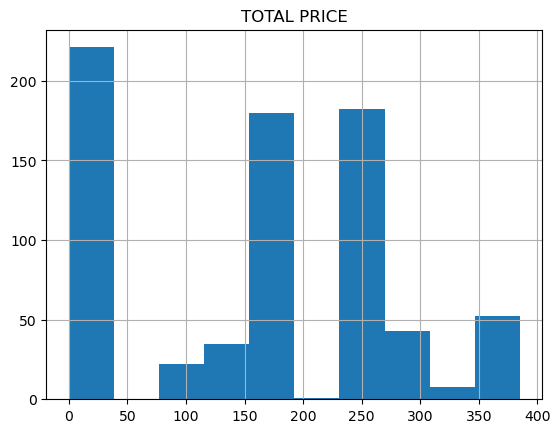

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    744.000000
mean      49.322581
std       10.744969
min       27.000000
25%       41.000000
50%       48.000000
75%       55.000000
max       78.000000
Name: AGE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


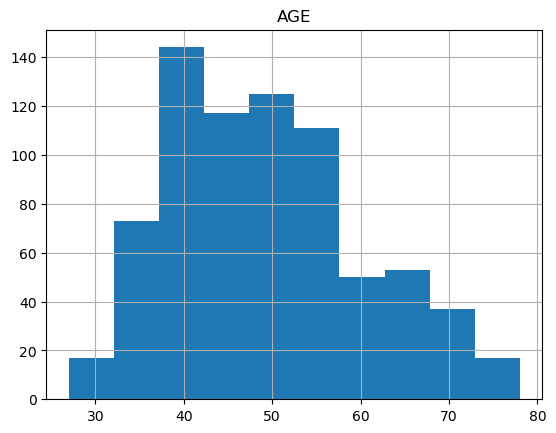

In [356]:
graphs_for_numeric(df_package)

## MAGNETIC RESONANCE

In [357]:
df_magnetic = df.loc[df["PROCESS CATEGORY"] == "MAGNETIC RESONANCE"]

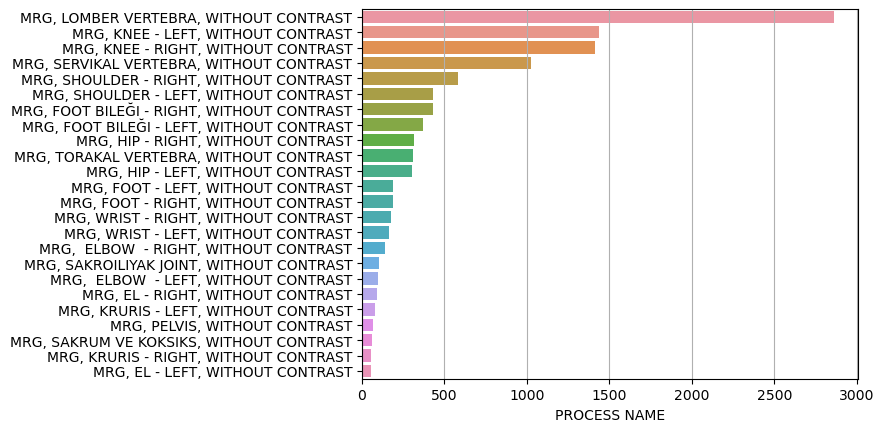

#####################################################################################
MRG, LOMBER VERTEBRA, WITHOUT CONTRAST        2864
MRG, KNEE - LEFT, WITHOUT CONTRAST            1440
MRG, KNEE - RIGHT, WITHOUT CONTRAST           1412
MRG, SERVIKAL VERTEBRA, WITHOUT CONTRAST      1022
MRG, SHOULDER - RIGHT, WITHOUT CONTRAST        585
MRG, SHOULDER - LEFT, WITHOUT CONTRAST         432
MRG, FOOT BILEĞI - RIGHT, WITHOUT CONTRAST     428
MRG, FOOT BILEĞI - LEFT, WITHOUT CONTRAST      367
MRG, HIP - RIGHT, WITHOUT CONTRAST             314
MRG, TORAKAL VERTEBRA, WITHOUT CONTRAST        311
MRG, HIP - LEFT, WITHOUT CONTRAST              302
MRG, FOOT - LEFT, WITHOUT CONTRAST             191
MRG, FOOT - RIGHT, WITHOUT CONTRAST            188
MRG, WRIST - RIGHT, WITHOUT CONTRAST           176
MRG, WRIST - LEFT, WITHOUT CONTRAST            165
MRG,  ELBOW  - RIGHT, WITHOUT CONTRAST         138
MRG, SAKROILIYAK JOINT, WITHOUT CONTRAST       104
MRG,  ELBOW  - LEFT, WITHOUT CONTRAST          

In [358]:
graphs_for_large_index(df= df_magnetic, col= "PROCESS NAME", count= 50)

###################################################################################################################################


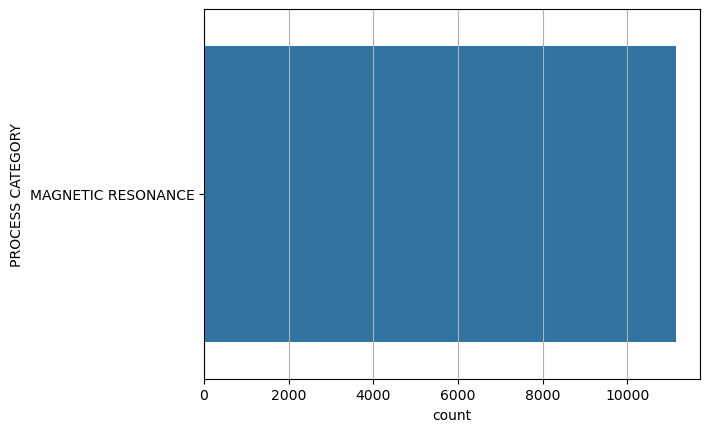

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11164
MAGNETIC RESONANCE    11164
Name: PROCESS CATEGORY, dtype: int64
###################################################################################################################################
MAGNETIC RESONANCE    100.0
Name: PROCESS CATEGORY, dtype: float64
###################################################################################################################################


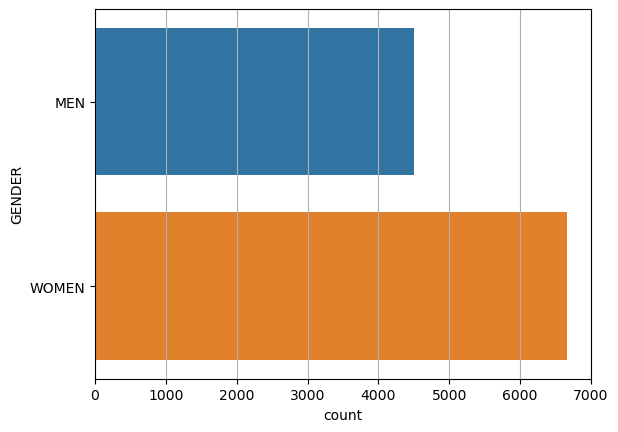

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11164
WOMEN    6668
MEN      4496
Name: GENDER, dtype: int64
###################################################################################################################################
WOMEN    59.727696
MEN      40.272304
Name: GENDER, dtype: float64
###################################################################################################################################


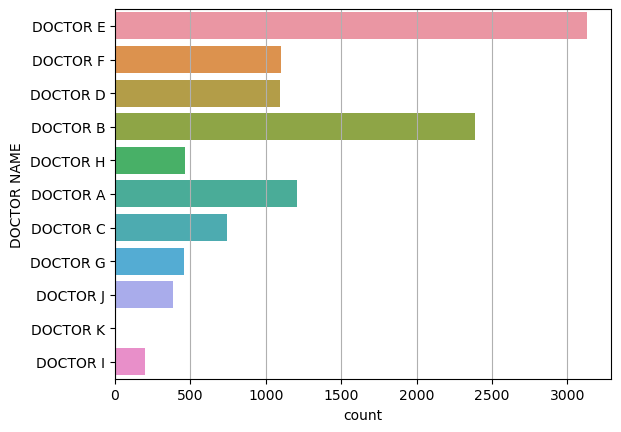

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11164
DOCTOR E    3132
DOCTOR B    2387
DOCTOR A    1205
DOCTOR F    1101
DOCTOR D    1091
DOCTOR C     741
DOCTOR H     465
DOCTOR G     456
DOCTOR J     382
DOCTOR I     200
DOCTOR K       4
Name: DOCTOR NAME, dtype: int64
###################################################################################################################################
DOCTOR E    28.054461
DOCTOR B    21.381225
DOCTOR A    10.793622
DOCTOR F     9.862057
DOCTOR D     9.772483
DOCTOR C     6.637406
DOCTOR H     4.165174
DOCTOR G     4.084558
DOCTOR J     3.421713
DOCTOR I     1.791473
DOCTOR K     0.035829
Name: DOCTOR NAME, dtype: float64
###################################################################################################################################


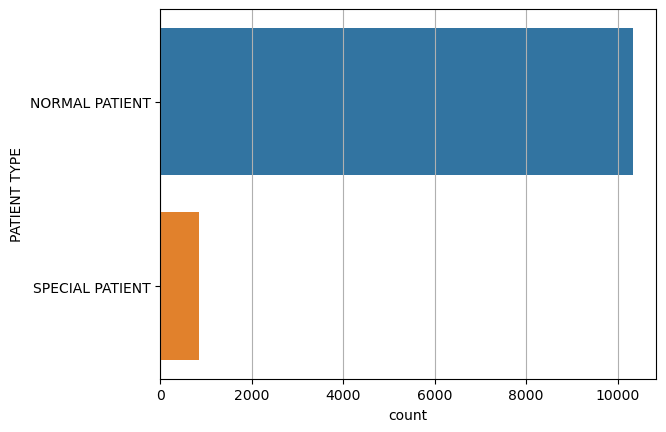

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11164
NORMAL PATIENT     10328
SPECIAL PATIENT      836
Name: PATIENT TYPE, dtype: int64
###################################################################################################################################
NORMAL PATIENT     92.511645
SPECIAL PATIENT     7.488355
Name: PATIENT TYPE, dtype: float64
###################################################################################################################################


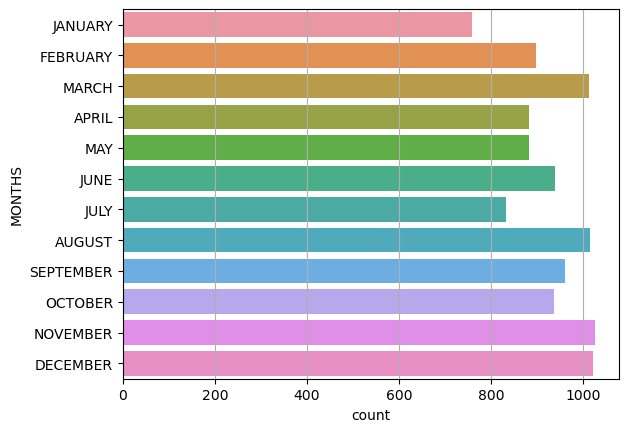

###################################################################################################################################
TOPLAM BU HİZMET GRUBUNDAN İŞLEM GÖREN KİŞİ SAYISI ===>  11164
NOVEMBER     1026
DECEMBER     1022
AUGUST       1014
MARCH        1013
SEPTEMBER     960
JUNE          939
OCTOBER       936
FEBRUARY      898
APRIL         883
MAY           882
JULY          833
JANUARY       758
Name: MONTHS, dtype: int64
###################################################################################################################################
NOVEMBER     9.190254
DECEMBER     9.154425
AUGUST       9.082766
MARCH        9.073809
SEPTEMBER    8.599068
JUNE         8.410964
OCTOBER      8.384092
FEBRUARY     8.043712
APRIL        7.909351
MAY          7.900394
JULY         7.461483
JANUARY      6.789681
Name: MONTHS, dtype: float64


In [359]:
graphs_for_category(df_magnetic)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    11164.000000
mean       461.010096
std        325.808911
min          0.000000
25%        385.875000
50%        498.750000
75%        621.250000
max       3830.868424
Name: TOTAL PRICE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


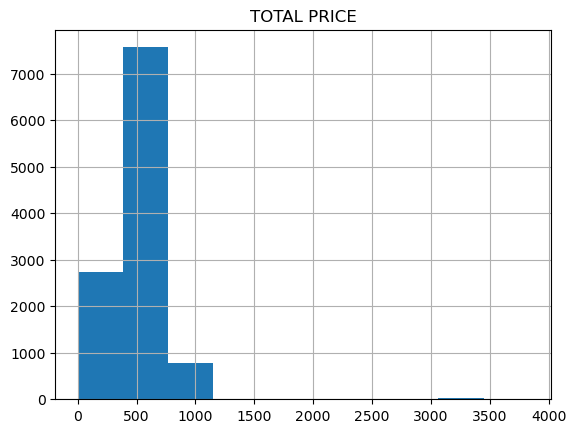

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    11164.000000
mean        47.598173
std         16.241430
min          4.000000
25%         36.000000
50%         47.000000
75%         59.000000
max         99.000000
Name: AGE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


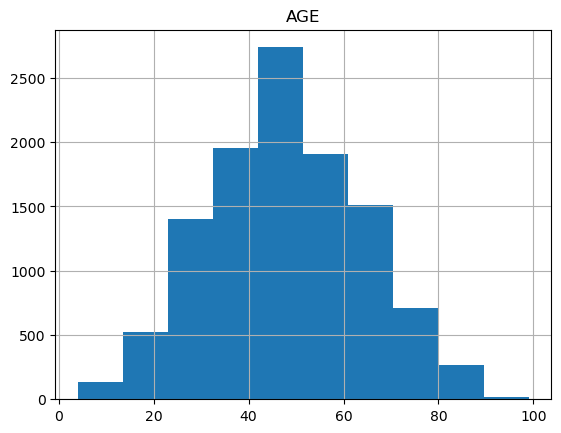

In [360]:
graphs_for_numeric(df_magnetic)

## RULE BASED CLASSİFİCATİON

In [361]:
df_agg = df.groupby(["AGE","GENDER"]).agg({"TOTAL PRICE" : "mean"}).sort_values("TOTAL PRICE", ascending= False)

In [362]:
df_agg.head()

TOTAL PRICE
AGE GENDER             
92  MEN      699.999912
100 MEN      498.750000
    WOMEN    381.937500
12  WOMEN    334.049993
16  WOMEN    324.246940

In [363]:
df_agg = df_agg.reset_index()

In [364]:
df_agg.head()

,AGE,GENDER,TOTAL PRICE
0,92,MEN,699.999912
1,100,MEN,498.750000
2,100,WOMEN,381.937500
3,12,WOMEN,334.049993
4,16,WOMEN,324.246940


In [365]:
bins = [0, 18, 30, 45, 60, df_agg["AGE"].max()]
mylabels = ["0_18", "18_30", "30_45", "45_60", "60_" + str(df_agg["AGE"].max())]
df_agg["age_cat"] = pd.cut(df_agg["AGE"], bins, labels= mylabels)

In [366]:

df_agg["customer_level_based"] = [row[1].upper() + "_" + row[3].upper() for  row in df_agg.values]

In [367]:
df_agg.head()

,AGE,GENDER,TOTAL PRICE,age_cat,customer_level_based
0,92,MEN,699.999912,60_100,MEN_60_100
1,100,MEN,498.750000,60_100,MEN_60_100
2,100,WOMEN,381.937500,60_100,WOMEN_60_100
3,12,WOMEN,334.049993,0_18,WOMEN_0_18
4,16,WOMEN,324.246940,0_18,WOMEN_0_18


In [368]:
df_agg = df_agg[["customer_level_based","TOTAL PRICE"]]

In [369]:
df_agg = df_agg.groupby("customer_level_based").agg({"TOTAL PRICE" : "mean"})

In [370]:
df_agg["SEGMENT"] = pd.cut(df_agg["TOTAL PRICE"], 3, labels = ["BAD","MEDİUM","GOOD"])
df_agg.head()

,TOTAL PRICE,SEGMENT
customer_level_based,,
MEN_0_18,203.821845,MEDİUM
MEN_18_30,185.524099,MEDİUM
MEN_30_45,160.035092,BAD
MEN_45_60,203.582975,MEDİUM
MEN_60_100,194.881173,MEDİUM


In [371]:
df_agg = df_agg.reset_index()

In [372]:
df_agg.head(50)

,customer_level_based,TOTAL PRICE,SEGMENT
0,MEN_0_18,203.821845,MEDİUM
1,MEN_18_30,185.524099,MEDİUM
2,MEN_30_45,160.035092,BAD
3,MEN_45_60,203.582975,MEDİUM
4,MEN_60_100,194.881173,MEDİUM
5,WOMEN_0_18,232.240489,GOOD
6,WOMEN_18_30,201.951008,MEDİUM
7,WOMEN_30_45,183.319814,BAD
8,WOMEN_45_60,207.929869,MEDİUM
9,WOMEN_60_100,184.908148,MEDİUM


In [373]:
df_agg.groupby("customer_level_based").agg({"TOTAL PRICE" : "mean"}).sort_values("TOTAL PRICE", ascending = False)

,TOTAL PRICE
customer_level_based,
WOMEN_0_18,232.240489
WOMEN_45_60,207.929869
MEN_0_18,203.821845
MEN_45_60,203.582975
WOMEN_18_30,201.951008
MEN_60_100,194.881173
MEN_18_30,185.524099
WOMEN_60_100,184.908148
WOMEN_30_45,183.319814


In [374]:
df_agg.groupby("SEGMENT").agg({"TOTAL PRICE" : "mean"}) 

,TOTAL PRICE
SEGMENT,
BAD,171.677453
MEDİUM,197.514160
GOOD,232.240489


In [375]:
new_user = "WOMEN_30_45"

In [376]:
df_agg[df_agg["customer_level_based"] == new_user]

,customer_level_based,TOTAL PRICE,SEGMENT
7,WOMEN_30_45,183.319814,BAD
